## 1. Situación problemática

En los ultimos años se observa un crecimiento en la cantidad de vuelos que realizan las personas, pero asi tambien hay una gran cantidad de oferta para hacerle frente a esa demanda.

En la actualidad, la satisfacción de los pasajeros es un factor crítico para las aerolíneas, pues influye directamente en la fidelidad de los clientes y en los ingresos. Estudios recientes muestran que la mayoria de los usuarios considera la calidad del servicio como factor clave en su elección de vuelo. Dentro de la experiencia de viaje, aspectos como la comodidad del asiento, la limpieza de la cabina y otros servicios a bordo (entretenimiento, comidas, Wi-Fi) marcan la percepción del pasajero

Ante este escenario la aerolinea US nos contrata para analizar los datos de las encuentas para conocer la satisfaccion del cliente y poder trabajar en mejorar los aspectos que influyen directamente sobre la misma, haciendo que aumenten los clientes y sean cada vez mas fieles.

## 2. Objetivo

En base a la problematica planteada, se realizará un análisis de las variables del dataset, con el fin de evaluar cuales son aquellas que llevan a la satisfaccion del cliente y cuales no.

Para esto vamos a plantear algunas hipotesis:

* La edad y la distancia del vuelo afecta a la satisfaccion del cliente?
* Si la clase de vuelo es mayor, la satisfaccion aumenta?
* El Check in y la reserva online ayuda a que aumente la satisfaccion? Influye la edad?
* El tipo de viaje influye en la satisfaccion del cliente?
* Los minutos de retraso tanto en la llegada como en la salida afectan?
* Hay algun servicio que impacte directamente en la satisfaccion del cliente?

Analizaremos los datos para responder a las mismas.

## 3. Dataset

### Fuente

El dataset utilizado en este trabajo se obtuvo de: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

### Características generales

Este dataset contiene datos de encuestas de satisfaccion de pasajeros de una aerolinea estadounidense. El dataset posee 103.904 filas, cada una de las cuales es una respuesta a la encuesta de satisfacción, donde la respuesta final es si estan satisfechos o no (Neutral or insatisfecho). El dataset contiene 24 columnas en las cuales se encuentran las caracteristicas de los clientes, caracteristicas del vuelo que tomaron, y el puntaje de satisfaccion de los distintos servicios del vuelo. En la siguiente sección se provee una descripción detallada de las mismas.

### Criterios de selección

El dataset se consideró adecuado por tener un número suficiente de filas y columnas, por tener una variable target relativamente balanceada, por tener suficiente cantidad de variables (cuantitativas y categóricas) y por tener escasos datos faltantes. Los análisis que permitieron llegar a estas conclusiones se describen en detalle en las siguientes secciones del proyecto.

## 4. Data wrangling

### Importación y lectura del dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Acceso al dataset:

In [68]:
url = 'https://drive.google.com/file/d/1wV813_Nz4MOaWTiB0sSVEoW9ZtH7dKo-/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id=1wV813_Nz4MOaWTiB0sSVEoW9ZtH7dKo-'
df_orig = pd.read_csv(path)

Visualización del dataset:

In [69]:
df_orig.head() #primeras filas

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [70]:
df_orig.info() #nombres de las columnas, tipos de datos y cantidad de nulos por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Se elimina la primer columna del dataset, ya que es una enumeracion, y en la segunda columna esta el ID.

In [71]:
df = df_orig.iloc[:, 1:]
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Diccionario de variables

* ID: Numero de cliente.
* Gender: Género de los pasajeros (Femenino, Masculino).
* Customer Type: El tipo de cliente (cliente leal, cliente desleal).
* Age: La edad de los pasajeros.
* Type of Travel: Motivo del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios).
* Class: Clase de viaje (Business, Eco, Eco Plus).
* Flight distance: La distancia de vuelo del viaje.
* Inflight wifi service: Nivel de satisfacción con el servicio de wifi a bordo.
* Departure/Arrival time convenient: Nivel de satisfacción de Hora de salida/llegada.
* Ease of Online booking: Nivel de satisfacción de la reserva online.
* Gate location: Nivel de satisfacción de la ubicación de la puerta.
* Food and drink: Nivel de satisfacción de Comida y bebida.
* Online boarding: Nivel de satisfacción del embarque online.
* Seat comfort: Nivel de satisfacción de la comodidad del asiento.
* Inflight entertainment: Nivel de satisfacción del entretenimiento a bordo.
* On-board service: Nivel de satisfacción del servicio a bordo.
* Leg room service: Nivel de satisfacción del servicio de espacio para las piernas.
* Baggage handling: Nivel de satisfacción en el manejo de equipaje.
* Check-in service: Nivel de satisfacción del servicio de check-in.
* Inflight service: Nivel de satisfacción del servicio a bordo.
* Cleanliness: Nivel de satisfacción de limpieza.
* Departure Delay in Minutes: Minutos de retraso en la salida
* Arrival Delay in Minutes: Minutos de retraso al llegar
* Satisfaction: Resultado de la encuenta, responde si esta satisfecho o no (Neutral o insatisfacción) con la aerolínea.

Las variables en donde se debe responder el nivel de satisfaccion el resultado va del 1 al 5, siendo el 0 "no aplica".

In [72]:
df.isna().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


Se observa que la columna "Arrival Delay in Minutes" tiene datos faltantes por lo que pasamos a reemplazar esos datos faltantes por la media, ya que son pocos datos y no afectarian al análisis.

In [73]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [74]:
df.isna().sum() # Compruebo que no hay datos nulos.

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


## 5. Análisis exploratorio de los datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

### 5.1 Análisis Univariado

Realizaremos un analisis de las estadísticas descriptivas (como media, mediana, desviación estándar, etc), visualizaremos algunas distribuciones de las variables numéricas y categóricas y crearemos gráficos exploratorios (histogramas, diagramas de dispersión, y diagramas de caja) para explorar los datos.

In [75]:
df.describe().round(2) #hacemos la estadística descriptiva del df

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00
mean,64924.21,39.38,1189.45,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,37463.81,15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.64
min,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,32533.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,64856.50,40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,97368.25,51.00,1743.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


Al observar las metricas estadisticas podemos concluir que:
* El 50% de la poblacion esta entre los 27 y los 51 años. La media es similar a la mediana, en torno a los 40 años.
* La media de los vuelos es de 1.189 Km y la desviacion estandar es de 997 Km, es decir que hay una gran variabilidad, vuelos desde 31 km hasta casi 5.000 km. Y el 25% de los vuelos son cortos, ya que no superan los 414 Km.
* En cuanto a los retrasos tanto en llegada como salida, podemos observar que hay valores outliers (Maximos de 1.592 min y 1.584 min, lo que influye en la media de aproximadamente 15 min, ya que el 75% de los vuelos tienen retrasos por debajo de la media (12 y 13 min).
* En cuanto a los servicios donde se evalua el nivel de satisfaccion la medida 0 (no aplica) impacta en las medias, por lo que deberiamos hacer un analisis mas profundo para poder sacar conclusiones. En principio podriamos decir que el 50% de la poblacion califica entre un 2 y un 4.

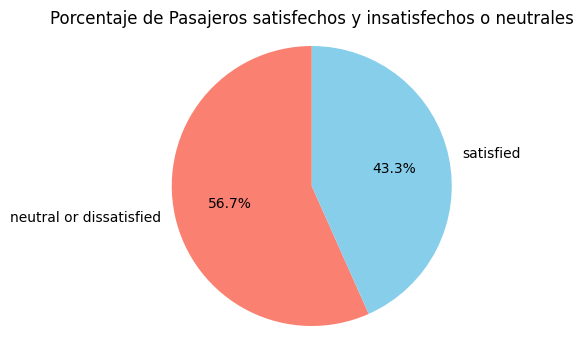

In [76]:
# Calcular conteos de la variable objetivo
satisfaction_counts = df['satisfaction'].value_counts()

# Graficar pie chart
plt.figure(figsize=(6, 4))
plt.pie(
    satisfaction_counts,
    labels=satisfaction_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['salmon','skyblue'])
plt.title('Porcentaje de Pasajeros satisfechos y insatisfechos o neutrales')
plt.axis('equal')  # Mantener proporción circular
plt.show()

Se observa que los datos estan bastante equilibrados entre los pasajeros satisfechos (43%) y los no satisfechos con un (57%).

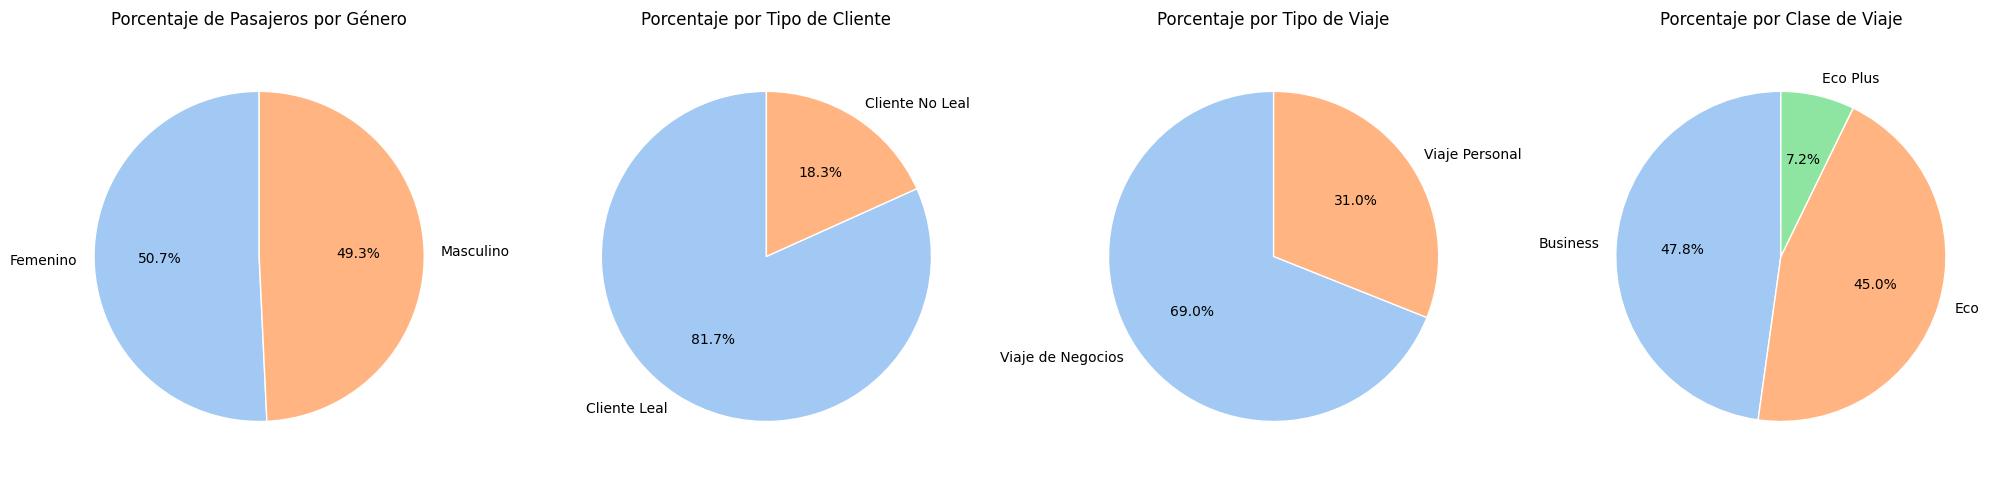

In [77]:
# Traducciones de categorías
traducciones = {
    'Gender': {'Male': 'Masculino', 'Female': 'Femenino'},
    'Customer Type': {'Loyal Customer': 'Cliente Leal', 'disloyal Customer': 'Cliente No Leal'},
    'Type of Travel': {'Business travel': 'Viaje de Negocios', 'Personal Travel': 'Viaje Personal'}}

# Variables categóricas y títulos
cat_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
custom_titles = [
    'Porcentaje de Pasajeros por Género',
    'Porcentaje por Tipo de Cliente',
    'Porcentaje por Tipo de Viaje',
    'Porcentaje por Clase de Viaje']

# Paleta pastel
max_cats = max(df[col].nunique() for col in cat_vars)
pastel_palette = sns.color_palette("pastel", max_cats)

# Crear figura
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, col, title in zip(axes, cat_vars, custom_titles):
    counts = df[col].value_counts()

    # Si la columna tiene traducción, la aplicamos
    if col in traducciones:
        labels = [traducciones[col][val] for val in counts.index]
    else:
        labels = counts.index  # Usamos los valores originales

    colors = pastel_palette[:len(counts)]

    ax.pie(
        counts,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'white'})
    ax.set_title(title)
    ax.axis('equal')

plt.tight_layout()
plt.show()

Si analizamos las variables categoricas podemos observar que en cuanto a genero esta dividido en formas casi iguales (51% mujeres y 49% hombres), hay muchos mas clientes leales (82%), el 69% de los viajes son por negocios y vemos que mas de un 90% de los pasajeros viajan en Business o en Economica (Eco), dividido de forma similar.

### 5.2 Análisis Bivariado

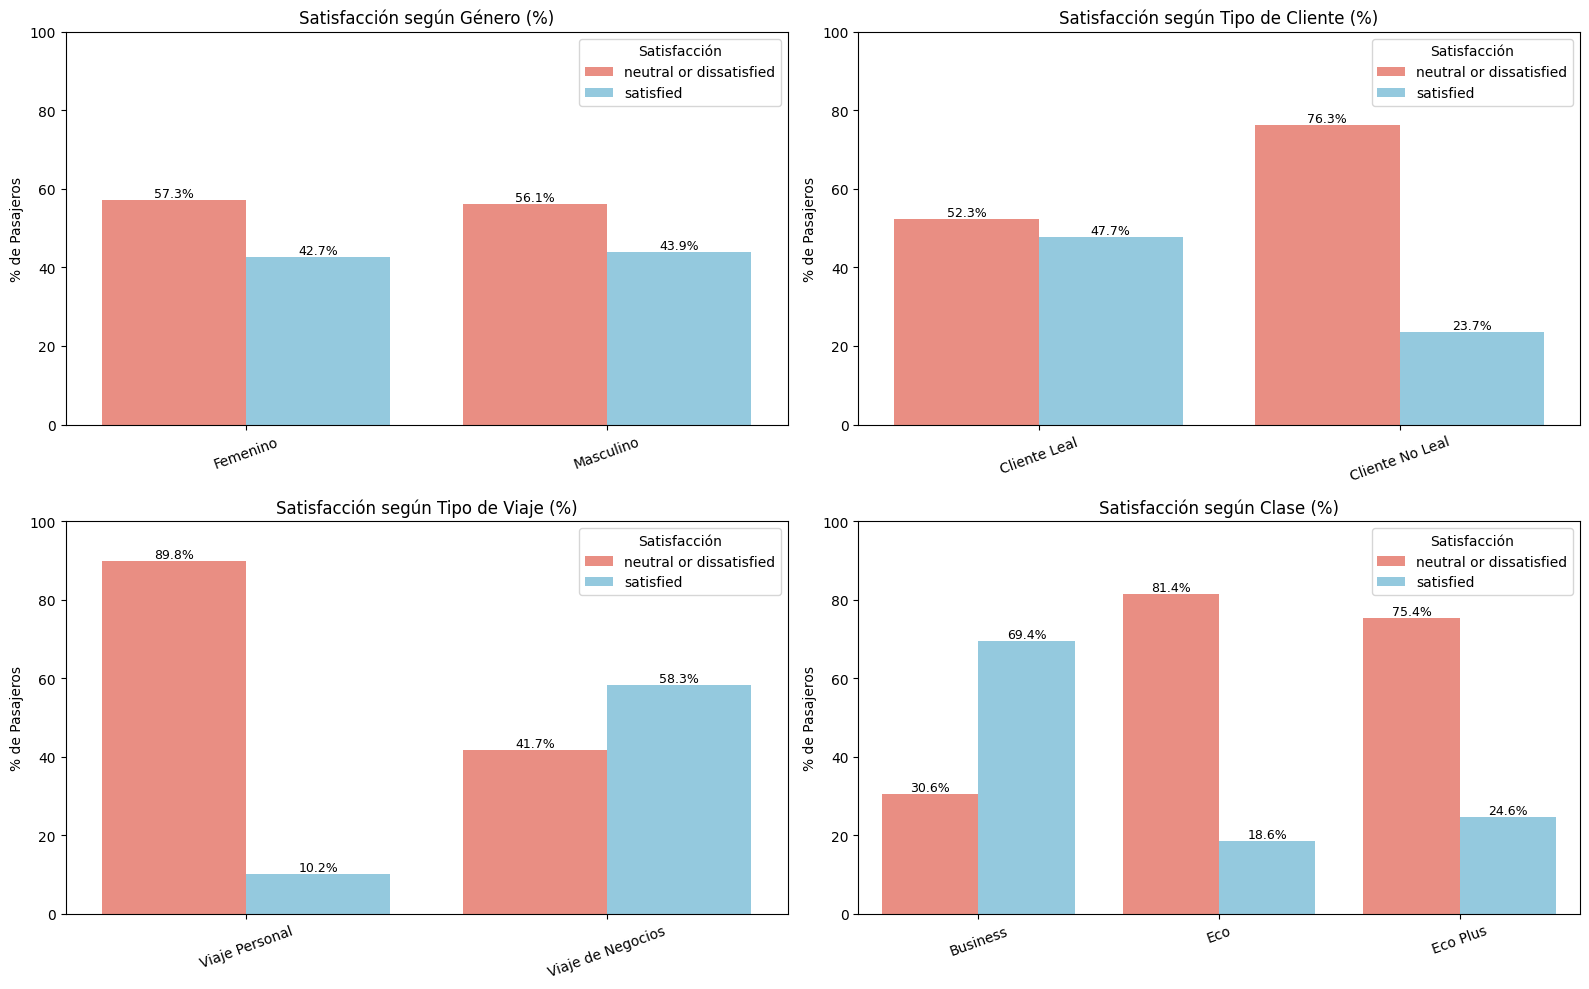

In [78]:
# Traducciones
traducciones = {
    'Gender': {'Male': 'Masculino', 'Female': 'Femenino'},
    'Customer Type': {'Loyal Customer': 'Cliente Leal', 'disloyal Customer': 'Cliente No Leal'},
    'Type of Travel': {'Business travel': 'Viaje de Negocios', 'Personal Travel': 'Viaje Personal'}}

# Variables categóricas a comparar con satisfaction
cat_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
titles = [
    'Satisfacción según Género (%)',
    'Satisfacción según Tipo de Cliente (%)',
    'Satisfacción según Tipo de Viaje (%)',
    'Satisfacción según Clase (%)']

# Preparar figura
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for ax, col, title in zip(axes, cat_vars, titles):
    temp_df = df.copy()

    # Traducciones
    if col in traducciones:
        temp_df[col] = temp_df[col].map(traducciones[col])

    # Calcular porcentaje por grupo
    grouped = temp_df.groupby([col, 'satisfaction']).size().reset_index(name='count')
    total_per_group = grouped.groupby(col)['count'].transform('sum')
    grouped['Porcentaje'] = 100 * grouped['count'] / total_per_group

    # Gráfico de barras
    sns.barplot(
        data=grouped,
        x=col,
        y='Porcentaje',
        hue='satisfaction',
        palette=['salmon','skyblue'],
        ax=ax)

    # Agregar % sobre cada barra
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{h.get_height():.1f}%' for h in container], label_type='edge', fontsize=9)

    # Etiquetas y formato
    ax.set_title(title)
    ax.set_ylabel('% de Pasajeros')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=20)
    ax.set_ylim(0, 100)
    ax.legend(title='Satisfacción')

plt.tight_layout()
plt.show()

Al oberservar estos graficos podemos concluir los siguiente:
* El genero no es una variable que afecte a la satisfaccion del cliente, los porcentajes son muy similares.
* Los clientes leales tienen una satisfaccion mayor en relacion a los clientes desleales (48% vs 24% clientes satisfechos).
* Si evaluamos los viajes personales, solo el 10% de los clientes quedan satisfechos. Mientras que si el viaje es de negocios casi el 60% de los clientes quedan satisfechos.
* En cuanto a las clases, si el cliente viaje en Business es muy probable que quede satisfecho (casi 70%), mientras que en Economica no supera el 19% y en Eco Plus esta por debajo del 25%.

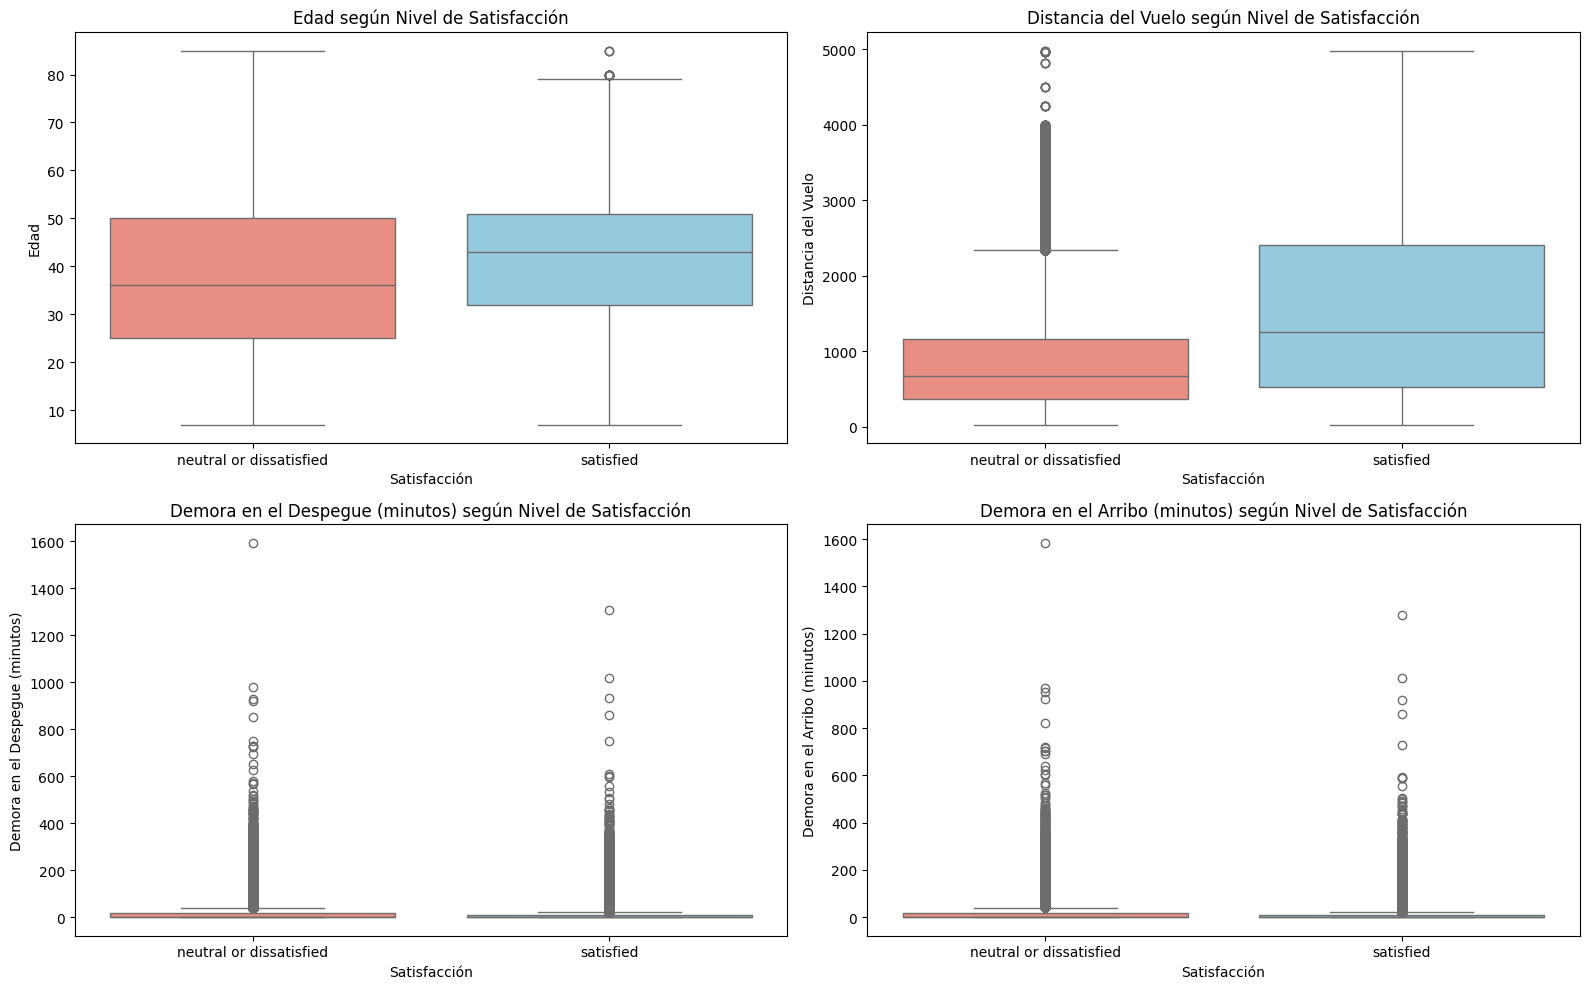

In [79]:
# Variables numéricas a analizar
num_vars = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Traducciones
traducciones = {
    'Age': 'Edad',
    'Flight Distance': 'Distancia del Vuelo',
    'Departure Delay in Minutes': 'Demora en el Despegue (minutos)',
    'Arrival Delay in Minutes': 'Demora en el Arribo (minutos)'}

# Crear figura
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Paleta personalizada
custom_palette = {
    'satisfied': 'skyblue',
    'neutral or dissatisfied': 'salmon'}

# Graficar cada variable con título y eje traducido
for ax, var in zip(axes, num_vars):
    sns.boxplot(
        data=df,
        x='satisfaction',
        y=var,
        hue='satisfaction',
        palette=custom_palette,
        ax=ax,
        legend=False)  # Evitamos warning
    ax.set_title(f'{traducciones[var]} según Nivel de Satisfacción')
    ax.set_xlabel('Satisfacción')
    ax.set_ylabel(traducciones[var])

plt.tight_layout()
plt.show()

Si observamos los boxplots podemos determinar que:
* Que la edad no es un factor determinante en la satisfaccion del cliente, ya que los boxplot son similares, salvo por el Q1 que en las personas satisfechas esta por encima de los 30 años, mientras que en las insatisfechas esta cerca de los 25 años, lo que lleva a que la mediana de los clientes satisfechos este cerca de los 45 años y en los insatisfechos cerca de los 35 años.
* Si analizamos la distancia de vuelo podemos determinar que los clientes satisfechos realizan vuelos mas largos, ya que el Q3 esta cerca de los 2.500 Km, mientras que el de los clientes insatisfechos esta cerca de los 1.100 Km, lo que impacta en las medianas, ya que la de los clientes satisfechos esta cerca del 1.200, mientras que la de los clientes insatisfechos esta cerca de los 800 Km. Conclusión, se puede decir que hay una relación positiva entre la distancia del vuelo y la satisfacción. A mayor distancia, más probabilidad de estar satisfecho.
* Los boxplot de demora en la salida y despegue no son claros por lo que lo vamos a complementar con otros graficos para poder sacar mejores conclusiones.

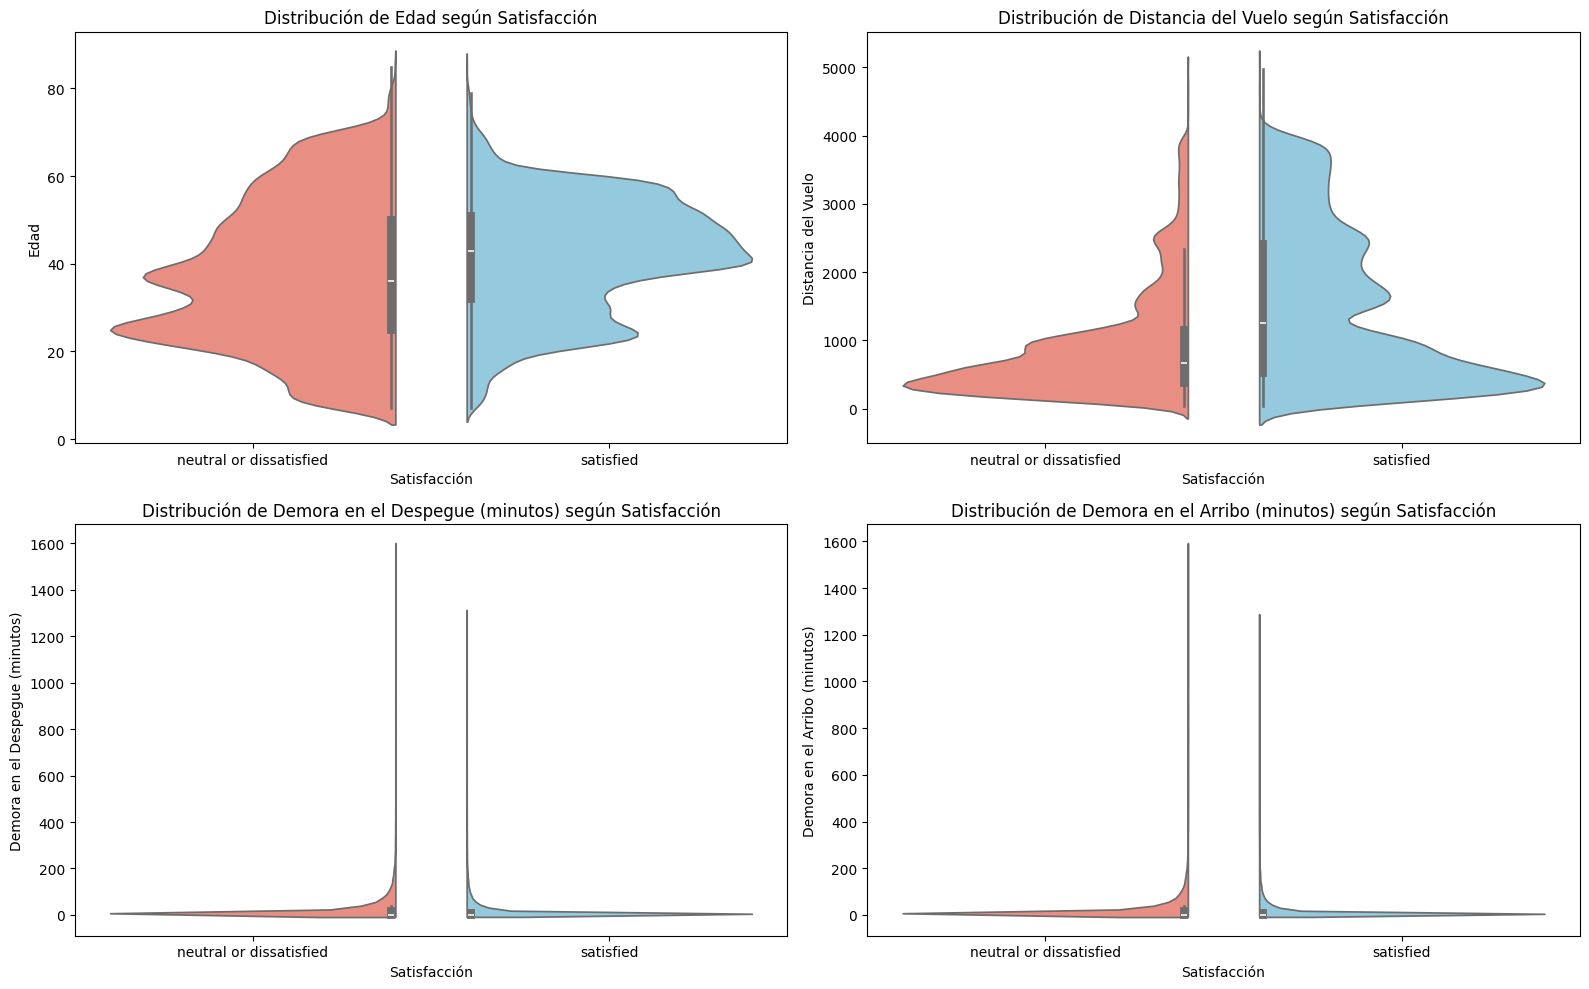

In [80]:
# Variables numéricas a analizar y sus traducciones
num_vars = [
    'Age',
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes']
traducciones = {
    'Age': 'Edad',
    'Flight Distance': 'Distancia del Vuelo',
    'Departure Delay in Minutes': 'Demora en el Despegue (minutos)',
    'Arrival Delay in Minutes': 'Demora en el Arribo (minutos)'}

# Crear figura con subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Paleta personalizada
custom_palette = {
    'satisfied': 'skyblue',
    'neutral or dissatisfied': 'salmon'}

# Graficar violin plots con títulos y ejes traducidos
for ax, var in zip(axes, num_vars):
    sns.violinplot(
        data=df,
        x='satisfaction',
        y=var,
        hue='satisfaction',
        palette=custom_palette,
        ax=ax,
        legend=False,
        split=True)
    ax.set_title(f'Distribución de {traducciones[var]} según Satisfacción')
    ax.set_xlabel('Satisfacción')
    ax.set_ylabel(traducciones[var])

plt.tight_layout()
plt.show()

Si a los boxplot le agregamos la densidad de la distribucion de las variables podemos determinar que:
* En relacion a la edad las distribuciones son similares, con picos en los clientes insatisfechos en los 25 y 40 años, mientras que los satisfechos es mayor el pico de los 40 años.
* En cuanto a la distribución de la distancia del vuelo, se puede observar con mayor claridad que una vez pasado los 1.000 Km la curva de los insatisfechos es mucho mas plana que en los clientes satisfechos.
* Si analizamos las demoras en el despegue y en el arribo, los graficos son muy similares, lo que podemos ver es que la distribucion de los clientes insatisfechos tiene mayor volumen que la de los clientes satisfechos.

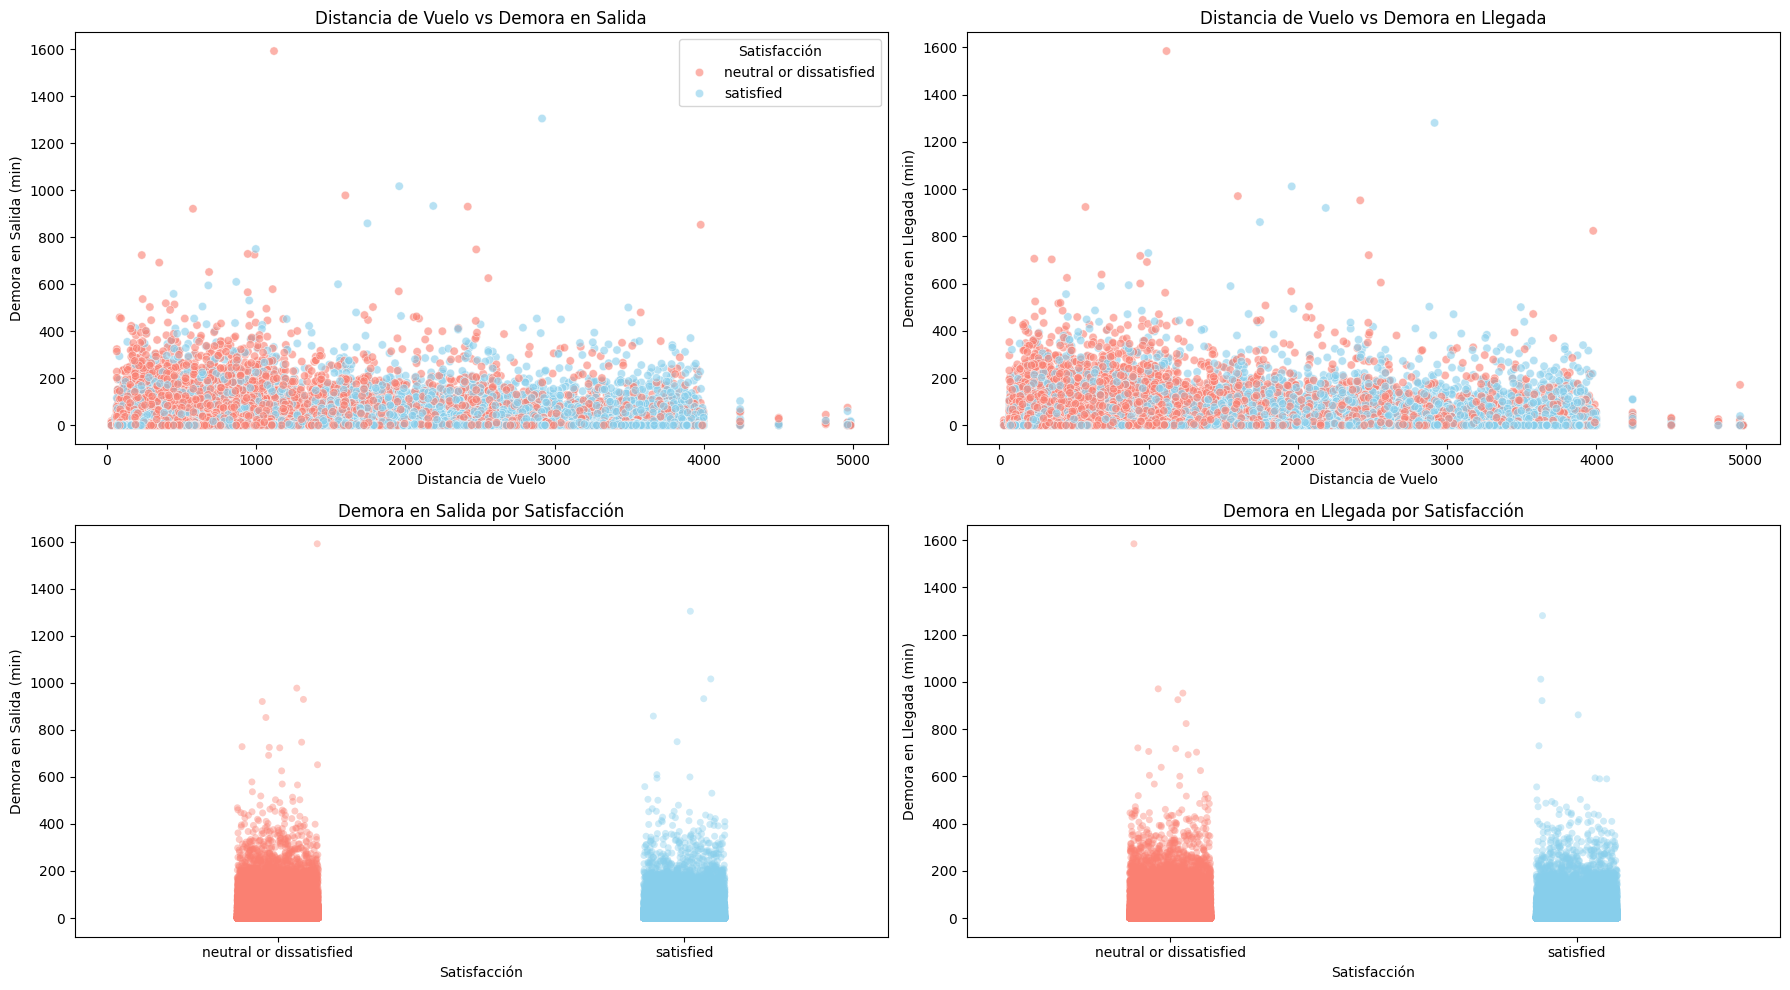

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
palette = {'satisfied': 'skyblue', 'neutral or dissatisfied': 'salmon'}

# 1. Scatterplot: Flight Distance vs Departure Delay
sns.scatterplot(
    data=df,
    x='Flight Distance',
    y='Departure Delay in Minutes',
    hue='satisfaction',
    palette=palette,
    alpha=0.6,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Distancia de Vuelo vs Demora en Salida')
axes[0, 0].set_xlabel('Distancia de Vuelo')
axes[0, 0].set_ylabel('Demora en Salida (min)')
axes[0, 0].legend(title='Satisfacción')

# 2. Scatterplot: Flight Distance vs Arrival Delay
sns.scatterplot(
    data=df,
    x='Flight Distance',
    y='Arrival Delay in Minutes',
    hue='satisfaction',
    palette=palette,
    alpha=0.6,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Distancia de Vuelo vs Demora en Llegada')
axes[0, 1].set_xlabel('Distancia de Vuelo')
axes[0, 1].set_ylabel('Demora en Llegada (min)')
axes[0, 1].legend().remove()

# 3. Stripplot: Departure Delay por Satisfacción
sns.stripplot(
    data=df,
    x='satisfaction',
    y='Departure Delay in Minutes',
    hue='satisfaction',
    palette=palette,
    jitter=True,
    alpha=0.4,
    ax=axes[1, 0],
    legend=False)
axes[1, 0].set_title('Demora en Salida por Satisfacción')
axes[1, 0].set_xlabel('Satisfacción')
axes[1, 0].set_ylabel('Demora en Salida (min)')

# 4. Stripplot: Arrival Delay por Satisfacción
sns.stripplot(
    data=df,
    x='satisfaction',
    y='Arrival Delay in Minutes',
    hue='satisfaction',
    palette=palette,
    jitter=True,
    alpha=0.4,
    ax=axes[1, 1],
    legend=False)
axes[1, 1].set_title('Demora en Llegada por Satisfacción')
axes[1, 1].set_xlabel('Satisfacción')
axes[1, 1].set_ylabel('Demora en Llegada (min)')

plt.tight_layout()
plt.show()

Si analizamos los diagramas de dispersión podemos concluir que los vuelos largos bien gestionados tienden a dar más satisfacción. Y si observamos los graficos 3 y 4 Stripplot con jitter (puntos individuales dispersos horizontalmente), la densidad de los clientes satisfechos va disminuyendo mientras aumenta la demora tanto en la salida como en la llegada. Por lo tanto la demora en Salida y/o en llegada afecta a la satisfaccion del cliente.

### 5.3 Análisis Multivariado

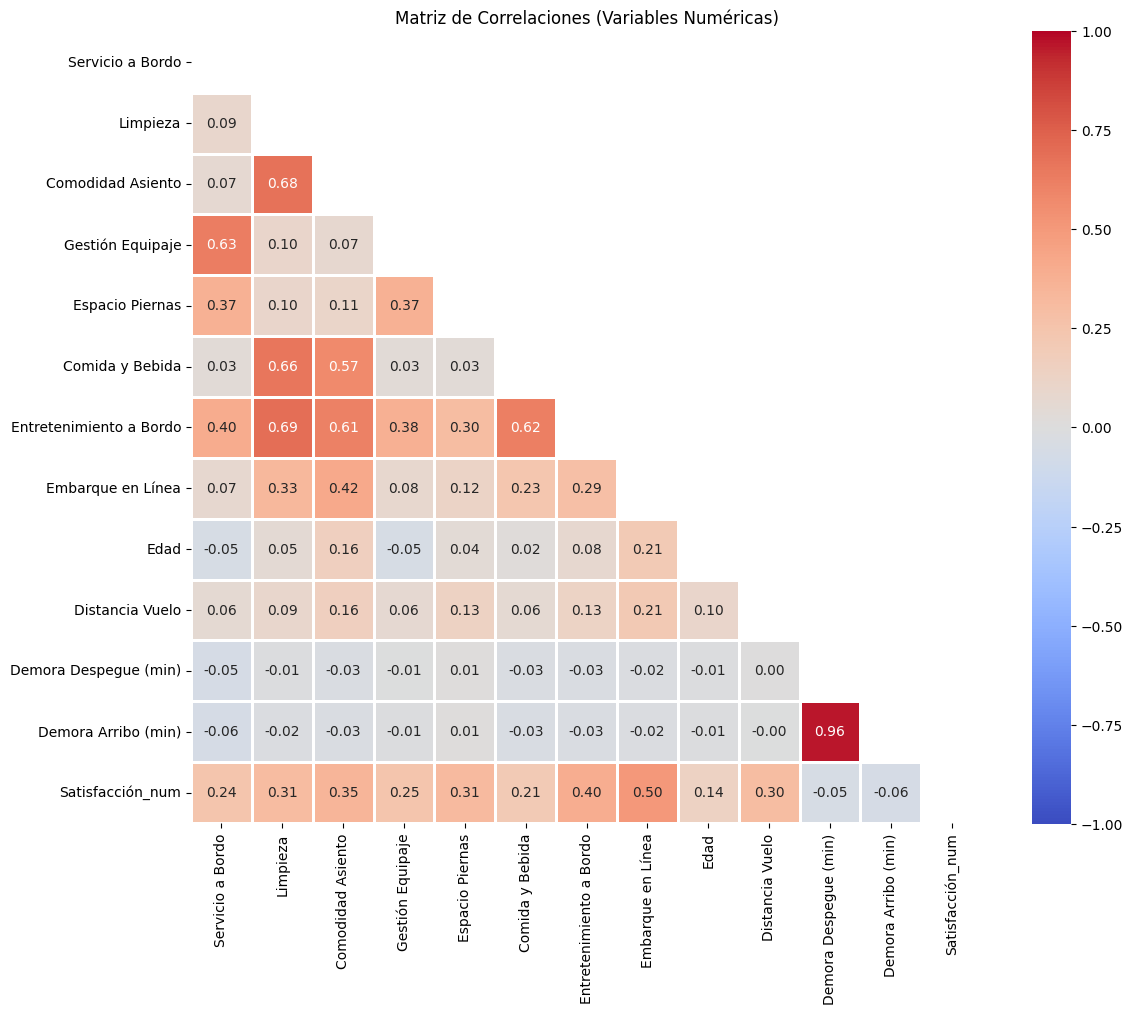

In [82]:
traducciones = {
    'Inflight service': 'Servicio a Bordo',
    'Cleanliness': 'Limpieza',
    'Seat comfort': 'Comodidad Asiento',
    'Baggage handling': 'Gestión Equipaje',
    'Leg room service': 'Espacio Piernas',
    'Food and drink': 'Comida y Bebida',
    'Inflight entertainment': 'Entretenimiento a Bordo',
    'Online boarding': 'Embarque en Línea',
    'Age': 'Edad',
    'Flight Distance': 'Distancia Vuelo',
    'Departure Delay in Minutes': 'Demora Despegue (min)',
    'Arrival Delay in Minutes': 'Demora Arribo (min)',
    'satisfaction': 'Satisfacción'}
df_esp = df.rename(columns=traducciones)

# 2. Crear variable numérica de satisfacción
df_esp['Satisfacción_num'] = df_esp['Satisfacción'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0})

# 3. Seleccionar columnas numéricas en español
servicios = [
    'Servicio a Bordo', 'Limpieza', 'Comodidad Asiento', 'Gestión Equipaje',
    'Espacio Piernas', 'Comida y Bebida', 'Entretenimiento a Bordo', 'Embarque en Línea']
numéricas = servicios + [    'Edad', 'Distancia Vuelo', 'Demora Despegue (min)', 'Demora Arribo (min)']

df_num = df_esp[numéricas + ['Satisfacción_num']].dropna()

# --- Heatmap de correlaciones ---
plt.figure(figsize=(12, 10))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, fmt=".2f", lw=1, vmin=-1, vmax=1,cmap='coolwarm', square=True)
plt.title('Matriz de Correlaciones (Variables Numéricas)')
plt.tight_layout()
plt.show()


Si analizamos el heatmap, podemos observar que las correlaciones mas importantes con la satisfaccion se dan en Embarque en linea(r ≈ +0.50), Entretenimiento a Bordo (r ≈ +0.40), Comodidad Asiento (r ≈ +0.35), Limpieza (r ≈ +0.31), Distancia Vuelo (r ≈ +0.30) y Demora Despegue de forma negativa (r ≈ -0.05). Las correlaciones no son muy fuertes, ni muy marcadas para determinar que una variable explique la satisfaccion.

Ademas podemos observar que la variable Demora Despegue y Arribo estan muy fuerte correlacionadas (r ≈ +0.96), lo que explica que si hay demora en la salida, la hay tambien en la llegada. Y que las variables de Servicios a Bordo estan correlacionadas entre si, por Ej: Entreteniemto a bordo con Limpieza (0.69), comida y bebida con Entetenimiento a bordo (0.62); Comida y bebida con Limpieza (0.66), Etc.

Tras estas concluciones para realizar el pairplot vamos a tomar las variables que mas correlacionadas estas con la Satisfaccion.


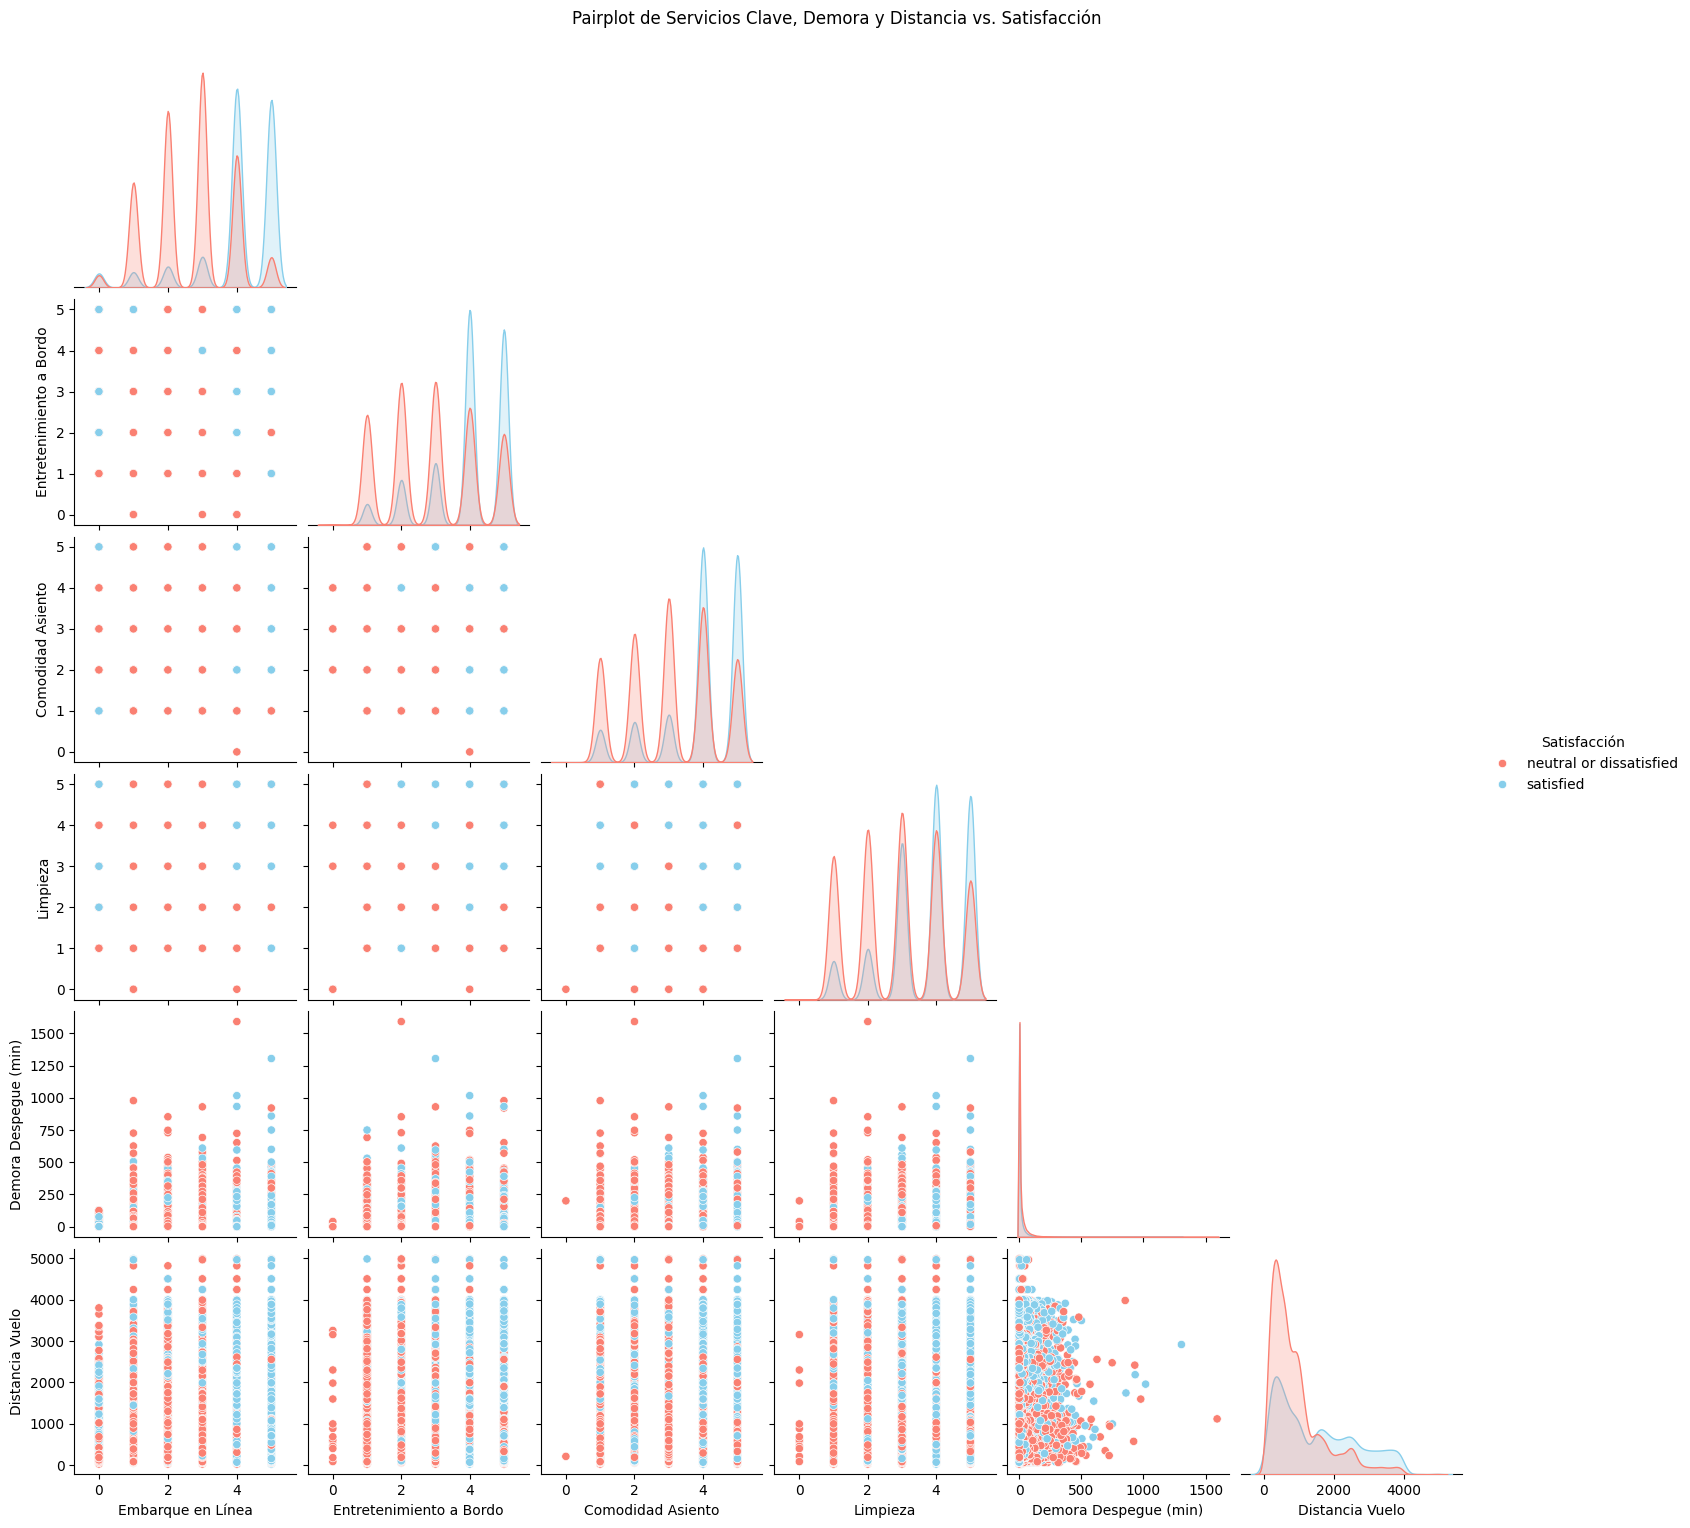

In [83]:
sns.pairplot(
    df_esp[
        ['Embarque en Línea',
         'Entretenimiento a Bordo',
         'Comodidad Asiento',
         'Limpieza',
         'Demora Despegue (min)',
         'Distancia Vuelo',
         'Satisfacción']],
    hue='Satisfacción',
    palette={'satisfied':'skyblue','neutral or dissatisfied':'salmon'},
    diag_kind='kde',
    corner=True)
plt.suptitle('Pairplot de Servicios Clave, Demora y Distancia vs. Satisfacción', y=1.02)
plt.show()

Si observamos el pairplot no hay una variable que explique por si sola la satisfaccion del cliente, sino que podemos llegar a la conclusion de que los vuelos de distancias mas largas con buenos servicios y pocas demoras son muy valorados.